## Question 4

### Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings("ignore")
import time
import pandas as pd

### Setting the model parameter like shape of input image and number of labels in CIFAR Dataset

In [2]:
num_classes = 10
input_shape = (32, 32, 3)

### Creating a function that takes train size as input and trains the model

In [3]:
def Create_Conv_Model(n = 5000) : 
    
    ### Loading the data and splitting data in train and test split. Also normalising the data
    
    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
    x_train = x_train[1:n]; y_train=y_train[1:n]

    # Scale images to the [0, 1] range
    x_train = x_train.astype("float32") / 255
    x_test = x_test.astype("float32") / 255
    print("orig x_train shape:", x_train.shape)

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    
    
    ### Setting the ConvNet parameters and Training the ConvNet model
    model_name = "cifar_TD.model"
    use_saved_model = False
    if use_saved_model:
        model = keras.models.load_model(model_name)
    else:
        model = keras.Sequential()
        
        model.add(Conv2D(8, (3, 3), padding= 'same', input_shape= x_train.shape[1: ], activation = 'relu' ) )
        model.add(Conv2D(8, (3, 3), strides = (2,2) , padding= 'same', activation = 'relu' ) )
        model.add(Conv2D(16, (3, 3), padding= 'same',  activation = 'relu') )
        model.add(Conv2D(16, (3, 3), strides = (2, 2) , padding= 'same', activation = 'relu' ) )
        model.add(Conv2D(32, (3, 3), padding= 'same', activation = 'relu') )
        model.add(Conv2D(32, (3, 3), strides = (2,2) , padding= 'same', activation = 'relu'))
        model.add(Dropout (0.5))
        model.add(Flatten( ))
        model.add(Dense(num_classes, activation = 'softmax', kernel_regularizer = regularizers.l1(0.0001)))
        model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
        model.summary()
        
        batch_size = 128
        epochs = 20
        
        ##Saving the time to train the CNN
        start_time = time.time()
        history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
        model.save(model_name)
        train_time = time.time() - start_time
        
        ### Plot of Model Accuracy Vs.Epochs
        plt.figure()
        plt.subplot(211)
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title(f'model accuracy for Thinner Deeper Network for training size {n}')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        
        
        ### Plot of Model Loss Vs.Epochs
        plt.figure()
        plt.subplot(212)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title(f'model loss for Thinner Deeper Network for training size {n}')
        plt.ylabel('loss'); plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()
    
    
    ### Testing model accuracy on Train Data
    preds_train = model.predict(x_train)
    y_pred_train = np.argmax(preds_train, axis=1)
    y_train1 = np.argmax(y_train, axis=1)
    print(f'Model Accuracy on Train Data for Thinner Deeper Network for training size {n}')
    print(classification_report(y_train1, y_pred_train))
    print(confusion_matrix(y_train1, y_pred_train))
    
    
    ### Testing model accracy on Test data
    preds_test = model.predict(x_test)
    y_pred_test = np.argmax(preds_test, axis=1)
    y_test1 = np.argmax(y_test, axis=1)
    print(f'\n\nModel Accuracy on Test Data Thinner Deeper Network for training size {n}')
    print(classification_report(y_test1, y_pred_test))
    print(confusion_matrix(y_test1, y_pred_test))
    
    
    if n == 50000 : 
        training_size_str = '50000 (Full Data Set)'
    else : 
        training_size_str = str(n)
    training_time_str = str(round(train_time, 2)) + ' seconds'
    accuracy_score_train = round(accuracy_score(y_train1, y_pred_train) * 100, 2)
    accuracy_score_train_str = str(accuracy_score_train) + '%'
    accuracy_score_test = round(accuracy_score(y_test1, y_pred_test) * 100, 2)
    accuracy_score_test_str = str(accuracy_score_test) + '%'
    
    
    CNN_model_Params_array = pd.array([training_size_str, training_time_str, accuracy_score_train_str, accuracy_score_test_str])
    
    return CNN_model_Params_array

### Trying above function for Different values of Training Sizes

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 8)         584       
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        1168      
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          2320      
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 32)          4640      
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 dropout (Dropout)

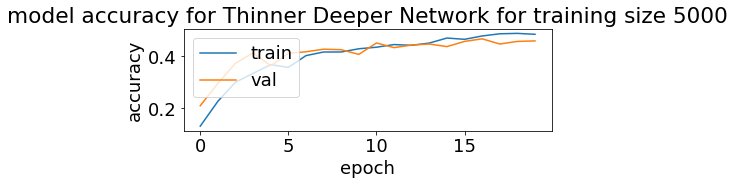

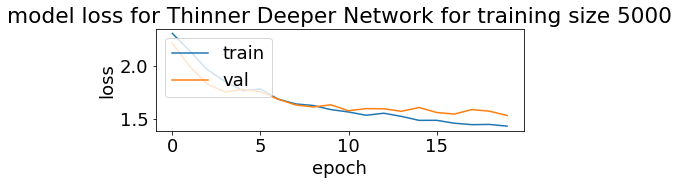

Model Accuracy on Train Data for Thinner Deeper Network for training size 5000
              precision    recall  f1-score   support

           0       0.49      0.65      0.56       505
           1       0.60      0.64      0.62       460
           2       0.49      0.44      0.46       519
           3       0.51      0.41      0.45       486
           4       0.47      0.44      0.46       519
           5       0.55      0.44      0.49       488
           6       0.56      0.63      0.59       518
           7       0.62      0.54      0.58       486
           8       0.59      0.61      0.60       520
           9       0.58      0.64      0.61       498

    accuracy                           0.54      4999
   macro avg       0.54      0.54      0.54      4999
weighted avg       0.54      0.54      0.54      4999

[[329  18  19   6  11   2   6  13  75  26]
 [ 24 295   0   6   4   2  12   7  33  77]
 [ 53  13 227  24  76  32  45  29  15   5]
 [ 16  10  34 198  27  71  63  22

In [4]:
n = 5000
CNN_model_array_5K = Create_Conv_Model(n)


orig x_train shape: (9999, 32, 32, 3)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 8)         224       
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 8)         584       
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 16)        1168      
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 16)          2320      
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 32)          4640      
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 dropout_1 (Drop

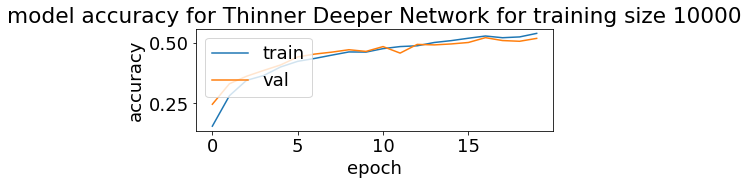

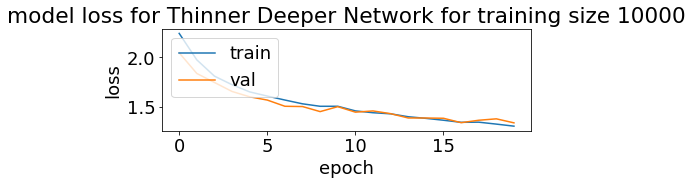

Model Accuracy on Train Data for Thinner Deeper Network for training size 10000
              precision    recall  f1-score   support

           0       0.61      0.61      0.61      1005
           1       0.76      0.62      0.68       974
           2       0.44      0.55      0.49      1032
           3       0.49      0.40      0.44      1016
           4       0.52      0.48      0.50       999
           5       0.56      0.48      0.52       937
           6       0.61      0.65      0.63      1029
           7       0.65      0.65      0.65      1001
           8       0.62      0.75      0.68      1025
           9       0.66      0.70      0.68       981

    accuracy                           0.59      9999
   macro avg       0.59      0.59      0.59      9999
weighted avg       0.59      0.59      0.59      9999

[[612  25  82   8  18   3   8  22 193  34]
 [ 44 600   8   7  10   8  14   7 104 172]
 [ 64   9 567  54 122  40  86  49  28  13]
 [ 23   5 134 409  64 168 113  4

In [5]:
n = 10000
CNN_model_array_10K = Create_Conv_Model(n)


orig x_train shape: (19999, 32, 32, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 8)         584       
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 16)        1168      
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 16)          2320      
                                                                 
 conv2d_16 (Conv2D)          (None, 8, 8, 32)          4640      
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 dropout_2 (Dro

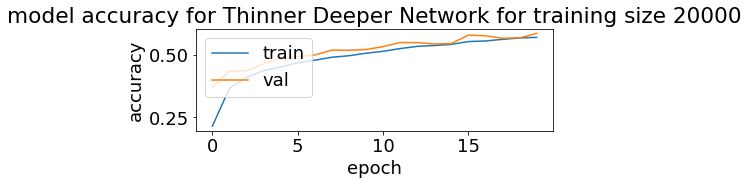

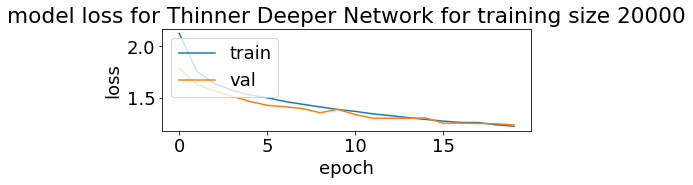

Model Accuracy on Train Data for Thinner Deeper Network for training size 20000
              precision    recall  f1-score   support

           0       0.72      0.61      0.66      1989
           1       0.79      0.73      0.76      1981
           2       0.53      0.51      0.52      2042
           3       0.46      0.44      0.45      2011
           4       0.59      0.48      0.53      2009
           5       0.54      0.54      0.54      1925
           6       0.60      0.75      0.67      2037
           7       0.63      0.75      0.69      2027
           8       0.75      0.76      0.76      2012
           9       0.70      0.69      0.69      1966

    accuracy                           0.63     19999
   macro avg       0.63      0.63      0.63     19999
weighted avg       0.63      0.63      0.63     19999

[[1217   58  138   57   49   21   36   52  267   94]
 [  40 1454   30   29   11   13   40   22   79  263]
 [  93   16 1048  171  194  141  207  116   30   26]
 [

In [6]:
n = 20000
CNN_model_array_20K = Create_Conv_Model(n)


orig x_train shape: (29999, 32, 32, 3)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 8)         584       
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 16)        1168      
                                                                 
 conv2d_21 (Conv2D)          (None, 8, 8, 16)          2320      
                                                                 
 conv2d_22 (Conv2D)          (None, 8, 8, 32)          4640      
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 dropout_3 (Dro

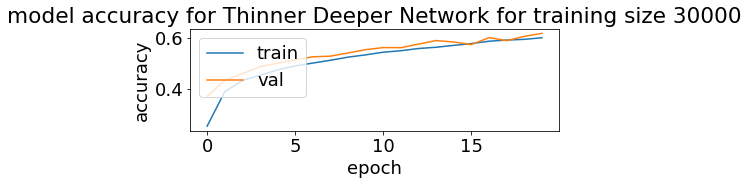

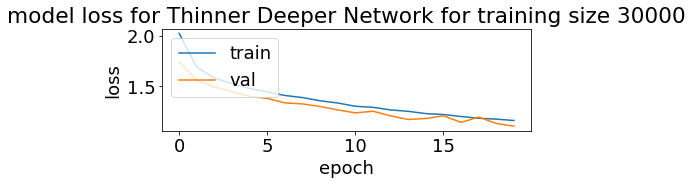

Model Accuracy on Train Data for Thinner Deeper Network for training size 30000
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      2983
           1       0.79      0.77      0.78      3023
           2       0.59      0.51      0.55      3007
           3       0.51      0.38      0.44      3008
           4       0.60      0.55      0.57      2999
           5       0.50      0.62      0.55      2954
           6       0.73      0.70      0.72      3015
           7       0.63      0.75      0.68      3042
           8       0.75      0.79      0.77      2973
           9       0.68      0.77      0.72      2995

    accuracy                           0.65     29999
   macro avg       0.65      0.65      0.65     29999
weighted avg       0.65      0.65      0.65     29999

[[1990   90  125   45   53   39   16   99  373  153]
 [  71 2316   20   17   14   23   32   39   73  418]
 [ 223   14 1538  191  298  301  160  164   81   37]
 [

In [7]:
n = 30000
CNN_model_array_30K = Create_Conv_Model(n)


orig x_train shape: (39999, 32, 32, 3)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 8)         584       
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 16)        1168      
                                                                 
 conv2d_27 (Conv2D)          (None, 8, 8, 16)          2320      
                                                                 
 conv2d_28 (Conv2D)          (None, 8, 8, 32)          4640      
                                                                 
 conv2d_29 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 dropout_4 (Dro

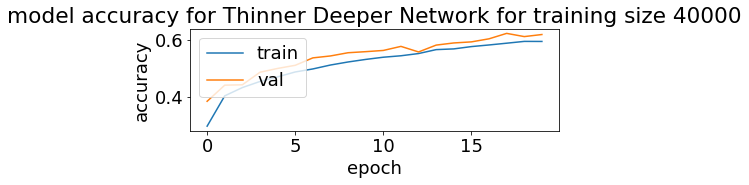

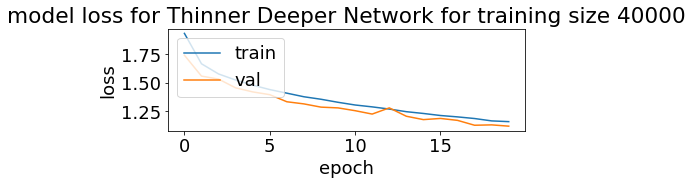

Model Accuracy on Train Data for Thinner Deeper Network for training size 40000
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      3986
           1       0.82      0.74      0.78      3986
           2       0.53      0.57      0.55      4048
           3       0.47      0.42      0.44      3984
           4       0.65      0.43      0.52      4003
           5       0.52      0.60      0.56      3975
           6       0.59      0.83      0.69      4019
           7       0.71      0.68      0.69      4023
           8       0.76      0.81      0.78      3997
           9       0.75      0.70      0.72      3978

    accuracy                           0.65     39999
   macro avg       0.65      0.65      0.64     39999
weighted avg       0.65      0.65      0.64     39999

[[2676   82  250   97   47   44   57   61  511  161]
 [  99 2969   31   42   23   26  117   34  191  454]
 [ 244   12 2311  250  228  336  424  148   68   27]
 [

In [8]:
n = 40000
CNN_model_array_40K = Create_Conv_Model(n)


orig x_train shape: (49999, 32, 32, 3)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 conv2d_31 (Conv2D)          (None, 16, 16, 8)         584       
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 16, 16)        1168      
                                                                 
 conv2d_33 (Conv2D)          (None, 8, 8, 16)          2320      
                                                                 
 conv2d_34 (Conv2D)          (None, 8, 8, 32)          4640      
                                                                 
 conv2d_35 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 dropout_5 (Dro

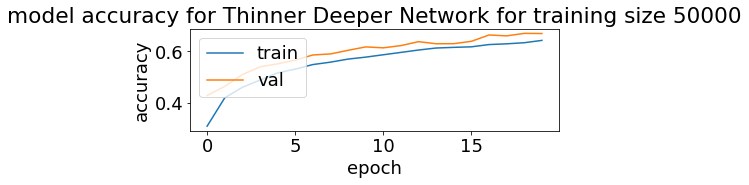

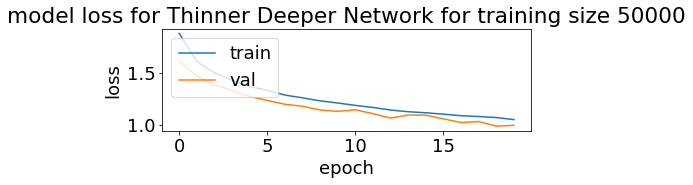

Model Accuracy on Train Data for Thinner Deeper Network for training size 50000
              precision    recall  f1-score   support

           0       0.76      0.69      0.73      5000
           1       0.77      0.86      0.81      5000
           2       0.70      0.46      0.55      5000
           3       0.48      0.56      0.52      5000
           4       0.64      0.59      0.61      5000
           5       0.60      0.57      0.59      5000
           6       0.80      0.72      0.76      4999
           7       0.65      0.78      0.71      5000
           8       0.76      0.84      0.80      5000
           9       0.75      0.80      0.77      5000

    accuracy                           0.69     49999
   macro avg       0.69      0.69      0.68     49999
weighted avg       0.69      0.69      0.68     49999

[[3475  168  148  126  100   33   23   76  647  204]
 [  47 4314    8   32    7   14   24   19  153  382]
 [ 378   70 2298  531  575  372  253  332  112   79]
 [

In [9]:
n = 50000
CNN_model_array_50K = Create_Conv_Model(n)


In [10]:
final_data_array = np.vstack((CNN_model_array_5K, CNN_model_array_10K))
final_data_array = np.vstack((final_data_array, CNN_model_array_20K))
final_data_array = np.vstack((final_data_array, CNN_model_array_30K))
final_data_array = np.vstack((final_data_array, CNN_model_array_40K))
final_data_array = np.vstack((final_data_array, CNN_model_array_50K))

CNN_Models_DF = pd.DataFrame()
CNN_Models_DF = CNN_Models_DF.append(pd.DataFrame(final_data_array, columns = ["Training Size", "Training Time", "Accuracy on Training Data", "Accuracy on Test Data"]), ignore_index = True)

display(CNN_Models_DF)


,Training Size,Training Time,Accuracy on Training Data,Accuracy on Test Data
0,5000,18.1 seconds,54.35%,46.01%
1,10000,19.49 seconds,58.91%,52.25%
2,20000,41.26 seconds,62.84%,56.39%
3,30000,49.25 seconds,65.03%,61.05%
4,40000,66.76 seconds,64.52%,60.88%
5,50000 (Full Data Set),81.0 seconds,68.7%,65.16%
